Для анализа взяты данные оценок игр с сайта Metacritic за период 2011-2019.

In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('metacritic_games.csv')
df['release_date'] = df.release_date.astype('datetime64')
df.loc[:, 'release_date'] = df.loc[:, 'release_date'].dt.year
df.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,2011,51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,2011,32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,2011,84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,2011,27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,2011,81,1,0,251,39,11,90,84


**График 1** 

Гипотеза: "На PC больше всего мультиплеерных игр"

In [3]:
df_2 = df[df['number_players'] == 'Online Multiplayer']
df_2.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
7,Total War: Shogun 2,PC,Creative Assembly,Strategy,Online Multiplayer,T,2011,62,0,0,187,44,29,90,84
29,Rift,PC,Trion Worlds,Role-Playing,Online Multiplayer,T,2011,56,3,0,121,51,47,84,73
31,Anno 2070,PC,"Blue Byte, Related Designs",Strategy,Online Multiplayer,T,2011,29,4,0,69,27,51,83,71
84,Red Orchestra 2: Heroes of Stalingrad,PC,Tripwire Interactive,Action,Online Multiplayer,M,2011,31,17,1,174,50,77,76,73
87,Two Worlds II,PC,Reality Pump,Role-Playing,Online Multiplayer,M,2011,19,12,0,31,37,22,76,64


In [4]:
multiplayer_game = df_2.groupby('platform')[['number_players']].count().sort_values('number_players', ascending=True).head(5).reset_index()
multiplayer_game.columns=['platform', 'multiplayer_games']
multiplayer_game

,platform,multiplayer_games
0,WIIU,1
1,XONE,12
2,PS4,14
3,Switch,19
4,PC,172


Text(0.5, 1.0, 'Top quantity multiplayer games')

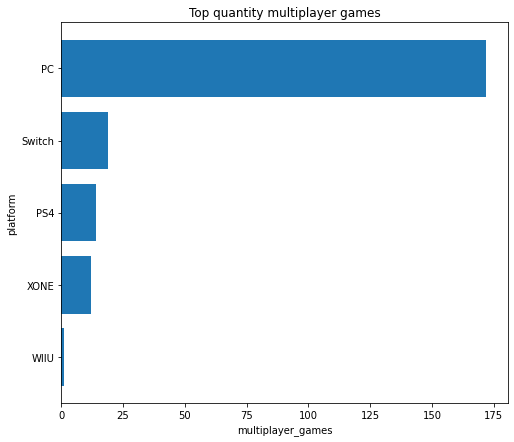

In [5]:
plt.barh(multiplayer_game['platform'], multiplayer_game['multiplayer_games'])
plt.xlabel('multiplayer_games')
plt.ylabel('platform')
plt.title('Top quantity multiplayer games')

**Вывод:** В данной визуализации участвуют следующие переменные: 
- виды игровых платформ;
- колличество выходивших муьтиплеерных игр.

Исходя из полученного графика видно, что мультиплеерных игр больше всего на PC.
Данная визуализация была выбранана т.к. полностью отобажает разницу между сравниваемыми переменными.
Гипотеза подтвердилась.

**График 2** 

Гипотеза №1: "Количество игр с мультиплеером с каждым годом ростет"

Гипотеза №2: "Количество игр без мультиплеера с каждым годом снижается"

In [6]:
df_3 = df[df['number_players'].isin(['Online Multiplayer', 'No Online Multiplayer'])]
df_3.head()

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,2011,32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,2011,84,1,0,283,20,5,94,90
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,2011,81,1,0,251,39,11,90,84
5,Deus Ex: Human Revolution,PC,Nixxes Software,Action,No Online Multiplayer,M,2011,52,0,0,520,112,78,90,85
7,Total War: Shogun 2,PC,Creative Assembly,Strategy,Online Multiplayer,T,2011,62,0,0,187,44,29,90,84


In [7]:
df_4 = df_3[['number_players', 'release_date', 'game']]

In [8]:
df_4

,number_players,release_date,game
1,No Online Multiplayer,2011,The Elder Scrolls V: Skyrim
2,No Online Multiplayer,2011,The Legend of Zelda: Ocarina of Time 3D
4,No Online Multiplayer,2011,Super Mario 3D Land
5,No Online Multiplayer,2011,Deus Ex: Human Revolution
7,Online Multiplayer,2011,Total War: Shogun 2
...,...,...,...
5694,No Online Multiplayer,2019,Modern Combat: Blackout
5695,No Online Multiplayer,2019,Fimbul
5696,Online Multiplayer,2019,Generation Zero
5697,No Online Multiplayer,2019,Vane


In [9]:
game = df_4.groupby(['release_date', 'number_players']).count()
game.unstack('number_players')

game                   
number_players No Online Multiplayer Online Multiplayer
release_date                                           
2011                              38                  5
2012                              44                 12
2013                              91                 13
2014                             120                  8
2015                             210                  9
2016                             241                 36
2017                             378                 48
2018                             654                 70
2019                              93                 17

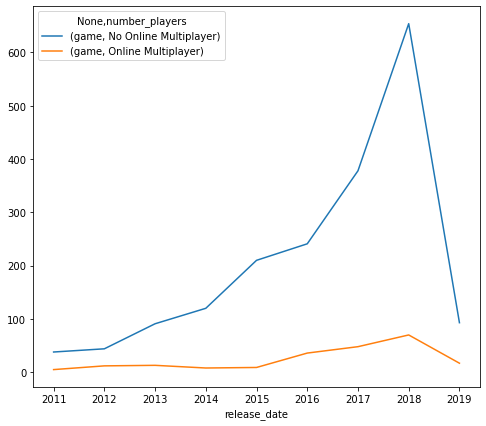

In [10]:
game.unstack('number_players').plot()

**Вывод:** В данной визуализации участвуют следующие переменные: 
- колличество игр;
- года входа.

Данная визуализация была выбранана т.к. наилучшим образом отображает динамикувыхода игр.
Из графика можно сделать вывод, что с каждым годом число игр с мультиплеером рост, но и сингл плеерные игр стремительно идут вверх.

Гипотеза №1 подтвердилась.

Гипотеза №2 не подтвердилась

Кроме того, на графике видно резкое снижение релизов в 2019 году. Это обусловленно не полнотой данных за 2019 год.

**График 3**

Данная визуализация была выбрана для наглядного отображения доли мультиплеерных и сингл плеерных игр.
Считаю что в данном случае круговая диаграмма лучше всего визуализирует данное соотношение.

В качестве переменных были выбранны:

- колличество пользователей (в данной колонке отображается наличие или отсутствие мультиплеера)
- колличество игр


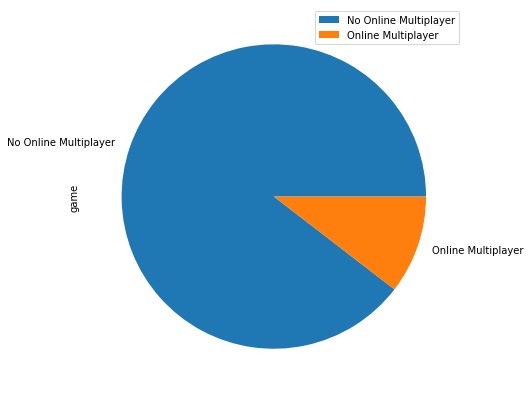

In [11]:
df_5 = df_3[['number_players', 'game']]
game_2 = df_5.groupby(['number_players']).count()
game_2.plot(kind='pie', y='game')

**График 4**

Были отобраны самые любимые жанры.
Вопрос на который подразумевается ответ с помощью графика: "На какой из платформ выходили самые крутые игры в данных жанрах"

In [12]:
platform_genre_rating = df.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='metascore', 
                        aggfunc=max).fillna(0).applymap(int)
platform_genre_rating_2 = platform_genre_rating[['Action Adventure', 'Action RPG', 'Horror', 'Platformer', 'Racing', 'Shooter']]
platform_genre_rating_2

genre,Action Adventure,Action RPG,Horror,Platformer,Racing,Shooter
platform,,,,,,
3DS,86,91,0,90,67,0
PC,92,93,86,85,89,86
PS4,97,92,88,90,86,84
Switch,97,80,0,0,84,0
VITA,88,0,65,0,0,90
WIIU,91,85,0,93,0,0
XONE,97,91,82,82,92,86


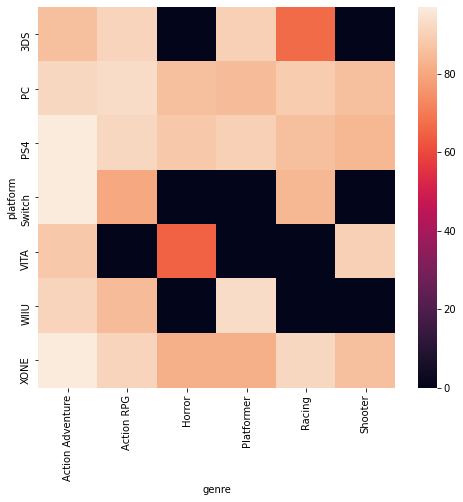

In [13]:
heat_map = sns.heatmap(platform_genre_rating_2)

**Вывод**

В качестве графика была выбрана епловая карта, так как на мой взгляд она более наглядно отображает сравнительный анализ нескольких переменных.

В качастве параметоров были выбраны:

- платформы;
- жанры игр;
- самые максимальные оценки по каждому из жанров.

Исходя из полученного графика можно сделать вывод, что наиболее предпочтительной кплатформой будет PS4.

**График 5**

Гипотеза: "Мета рейтинг и юзерский рейтинг в целом одинаковый"

In [14]:
rating = df[['game', 'release_date', 'platform', 'metascore', 'user_score']]
ps4_games = rating[rating['platform'] == 'PS4'].sort_values('metascore', ascending=False)
ps4_games

,game,release_date,platform,metascore,user_score
1117,Grand Theft Auto V,2014,PS4,97,83
4511,Red Dead Redemption 2,2018,PS4,97,79
1118,The Last of Us Remastered,2014,PS4,95,91
4512,God of War,2018,PS4,94,91
2590,Uncharted 4: A Thief's End,2016,PS4,93,84
...,...,...,...,...,...
3527,Ghostbusters,2016,PS4,30,10
5519,The Quiet Man,2018,PS4,29,23
1759,Basement Crawl,2014,PS4,27,28
4508,Road Rage,2017,PS4,26,23


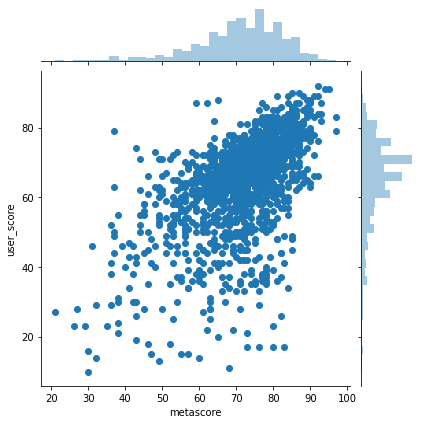

In [15]:
sns.jointplot(x='metascore', y='user_score', 
              data=ps4_games, kind='scatter')

**Вывод**

Данная визуализация была выбрана т.к. отлично отображает зависимост одной переменной от другой.
Другими словами, на данном графике мы можем увидеть как одна переменная изменяется при изменении второй.

Для данного графика использованны переменные:

- оценки студиями;
- пользовательские оценки.

В целом можно утверждать, что данные переменные имеют положительную корреляцию.
Крутым проектам ставятся поти одинаковые оценки, но бывают случаи, когда юзеры оценки значительно занижают.